## Генерация многомерных распределений

In [1006]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import scipy.stats as stats
import seaborn as sns

In [1007]:
class GenerateGauss:
    #принимаем на вход n - число случайных велечин, l - длина распределений
    def __init__(self, n, l):
        self.n = n
        self.l = l
        
    def generator(self, mu, sigm):
        df = pd.DataFrame()
        for i in range(self.n):
            #создаем матрицу из n гауссовских распределений
            df[i] = np.random.normal(mu, sigm**2, self.l)
        return df.to_numpy()
    
    @staticmethod
    def cov_matr(gaus_distr):
        #транспонируем сгенерированную матрицу гауссовских распределений (то, что возвращает generator)
        #считаем по этой матрице, матрицу ковариаций n случайных велечин
        data = gaus_distr.transpose()
        return np.cov(data)
   
    @staticmethod
    def make_markers(gaus_distr, class_point):
        data = gaus_distr.transpose()
        y = np.empty(len(gaus_distr))
        y.fill(class_point)
        return y

In [1008]:
g = GenerateGauss(2, 120)

In [1009]:
gaus_distr1 = g.generator(500, 9)
gaus_distr2 = g.generator(300, 7)
gaus_distr3 = g.generator(0, 8)

In [1010]:
gaus_distr1

array([[561.46949628, 412.9832777 ],
       [572.53866848, 424.0033091 ],
       [580.77670826, 450.59497291],
       [518.05526115, 671.15012292],
       [539.82822416, 397.14739245],
       [439.99661741, 517.25564221],
       [446.21487171, 416.26577574],
       [491.00433126, 413.75788879],
       [494.79194543, 543.612998  ],
       [577.3160067 , 452.53794078],
       [513.60277595, 541.37744461],
       [486.60678532, 546.81297647],
       [274.71113911, 404.56793631],
       [579.02071753, 413.99574571],
       [445.32672661, 382.51698033],
       [616.97882347, 529.54173413],
       [456.07711763, 607.22154849],
       [465.06746325, 594.16503772],
       [554.0730984 , 443.11212039],
       [649.66657241, 629.36635574],
       [521.50132572, 601.46121674],
       [605.37153066, 401.77348689],
       [525.80741654, 419.17184472],
       [538.01127527, 513.67257556],
       [572.22222732, 514.42552702],
       [430.55468497, 535.471108  ],
       [534.30375942, 423.56025026],
 

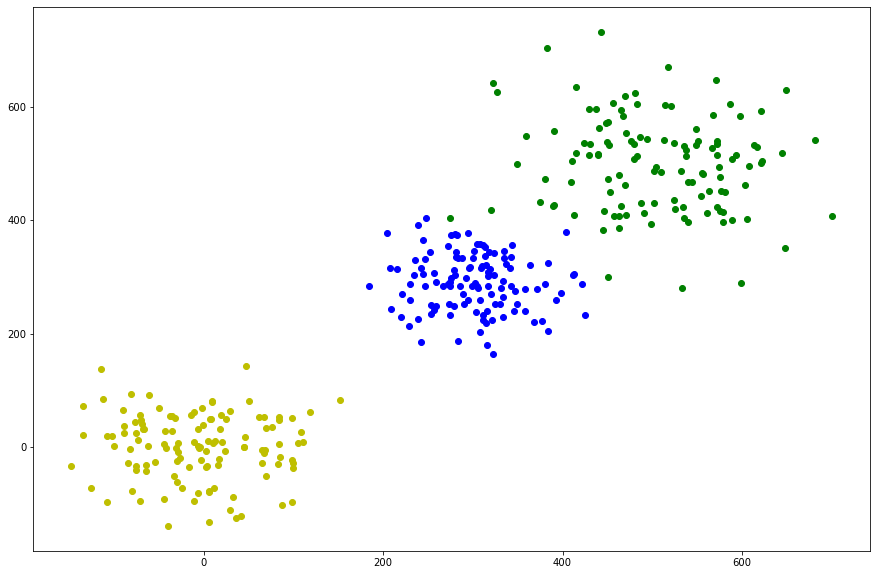

In [1011]:
plt.figure(figsize=(15, 10))  
for x,y in gaus_distr1:
    plt.scatter(x,y, color='g')
for x,y in gaus_distr2:
    plt.scatter(x,y, color='b')
for x,y in gaus_distr3:
    plt.scatter(x,y, color='y')
plt.show()

In [1012]:
Y1 = g.make_markers(gaus_distr1, 0)
Y2 = g.make_markers(gaus_distr2, 1)
Y3 = g.make_markers(gaus_distr3, 2)

In [1013]:
def prepare_data(gaus1, gaus2, y1, y2):
    part1 = int(0.7 * len(gaus1))
    X_train = np.vstack((gaus1[0:part1], gaus2[0:part1]))
    Y_train = y1[0:part1]
    Y_train = np.append(Y_train, y2[0:part1])
    
    X_test = np.vstack((gaus1[part1:], gaus2[part1:]))
    Y_test = y1[part1:]
    Y_test= np.append(Y_test, y2[part1:])
    
    return X_train, Y_train, X_test, Y_test

def prepare_data3(gaus1, gaus2, gaus3, y1, y2, y3):
    part1 = int(0.7 * len(gaus1))
    X_train = np.vstack((gaus1[0:part1], gaus2[0:part1], gaus3[0:part1]))
    Y_train = y1[0:part1]
    Y_train = np.append(Y_train, y2[0:part1])
    Y_train = np.append(Y_train, y3[0:part1])
    
    X_test = np.vstack((gaus1[part1:], gaus2[part1:], gaus3[part1:]))
    Y_test = y1[part1:]
    Y_test= np.append(Y_test, y2[part1:])
    Y_test= np.append(Y_test, y3[part1:])

    return X_train, Y_train, X_test, Y_test

In [1014]:
#X_train, Y_train, X_test, Y_test = prepare_data(gaus_distr1, gaus_distr2, Y1, Y2)
X_train, Y_train, X_test, Y_test = prepare_data3(gaus_distr1, gaus_distr2, gaus_distr3, Y1, Y2, Y3)

In [1015]:
type(X_test[0])

numpy.ndarray

In [1016]:
X_train

array([[ 5.61469496e+02,  4.12983278e+02],
       [ 5.72538668e+02,  4.24003309e+02],
       [ 5.80776708e+02,  4.50594973e+02],
       [ 5.18055261e+02,  6.71150123e+02],
       [ 5.39828224e+02,  3.97147392e+02],
       [ 4.39996617e+02,  5.17255642e+02],
       [ 4.46214872e+02,  4.16265776e+02],
       [ 4.91004331e+02,  4.13757889e+02],
       [ 4.94791945e+02,  5.43612998e+02],
       [ 5.77316007e+02,  4.52537941e+02],
       [ 5.13602776e+02,  5.41377445e+02],
       [ 4.86606785e+02,  5.46812976e+02],
       [ 2.74711139e+02,  4.04567936e+02],
       [ 5.79020718e+02,  4.13995746e+02],
       [ 4.45326727e+02,  3.82516980e+02],
       [ 6.16978823e+02,  5.29541734e+02],
       [ 4.56077118e+02,  6.07221548e+02],
       [ 4.65067463e+02,  5.94165038e+02],
       [ 5.54073098e+02,  4.43112120e+02],
       [ 6.49666572e+02,  6.29366356e+02],
       [ 5.21501326e+02,  6.01461217e+02],
       [ 6.05371531e+02,  4.01773487e+02],
       [ 5.25807417e+02,  4.19171845e+02],
       [ 5.

In [1069]:
class KmeansPP:
    def __init__(self, n_clusters, data, tol=150, max_iter=300):
        self.n_clusters = n_clusters
        self.data = data
        self.tol = tol
        self.max_iter = max_iter
     
    @staticmethod
    def euclidian_distance(x1, x2, y1, y2):
        return math.sqrt((x1-x2)**2 + (y1-y2)**2)
        
    def initial(self):
        #выбираем первый рандомный индекс
        rand_index = random.randint(0, len(self.data)-1)
        #выбираем первый центроид по индексу
        centroids = [self.data[rand_index]]
        for n in range(self.n_clusters-1):
            max_dist, dist = {}, {}
            #бегаю по вссем точкам и по центроидам
            for i in self.data:
                min_dict = {}
                for dote in centroids:
                    #считаю расстояние между точкой и центроилом
                    euclid = self.euclidian_distance(i[0], dote[0], i[1], dote[1])
                    #получаю индекс этой точки
                    dot_index = np.argmax(np.sum(self.data == i, axis = 1))
                    #добавляю в словарь евклидово расстояние и индекс точки
                    min_dict[euclid] = dot_index
                #получаю словарь с элементами - {минимальное расстояние : индекс}
                if i[0] != dote[0] or i[1] != dote[1]:
                    dist[min(min_dict)] = min_dict[min(min_dict)]
            #выбираю максимальное расстояние от одного из центроидов до точки и добавляю 
            #координаты этой точки в список центроидов
            centroids.append(self.data[dist[max(dist)]])
        return np.array(centroids)

    def fit(self):
        centroids_list = self.initial()
        self.centroids = {}
        for i in range(len(centroids_list)):
            self.centroids[i] = centroids_list[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.n_clusters):
                self.classifications[i] = []

            for featureset in self.data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print("NPSum - ", np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self):
        distances = [np.linalg.norm(self.data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

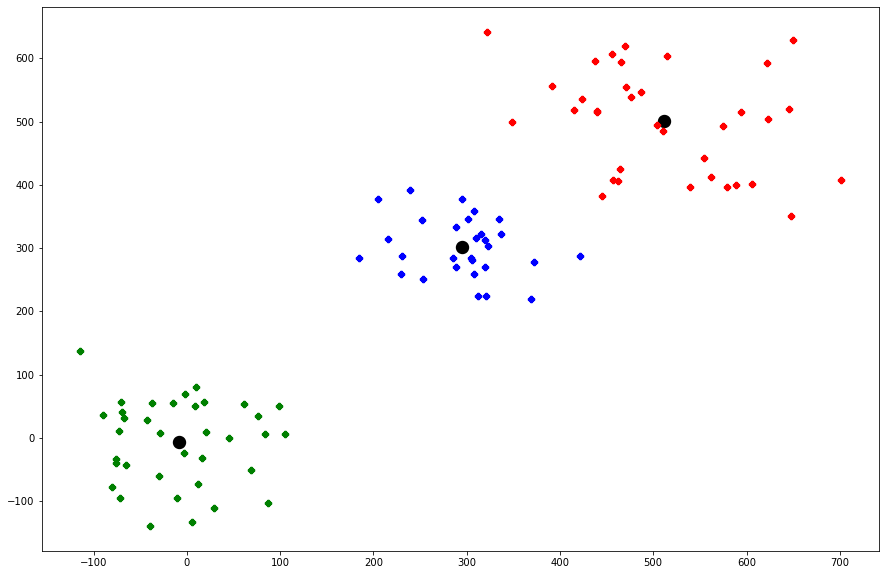

In [1070]:
colors = ['r','g','b','c','k','o','y']
clf = KmeansPP(3, X_train)
clf.fit()
plt.figure(figsize=(15, 10))  
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=70, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=20, linewidths=5)     
plt.show()

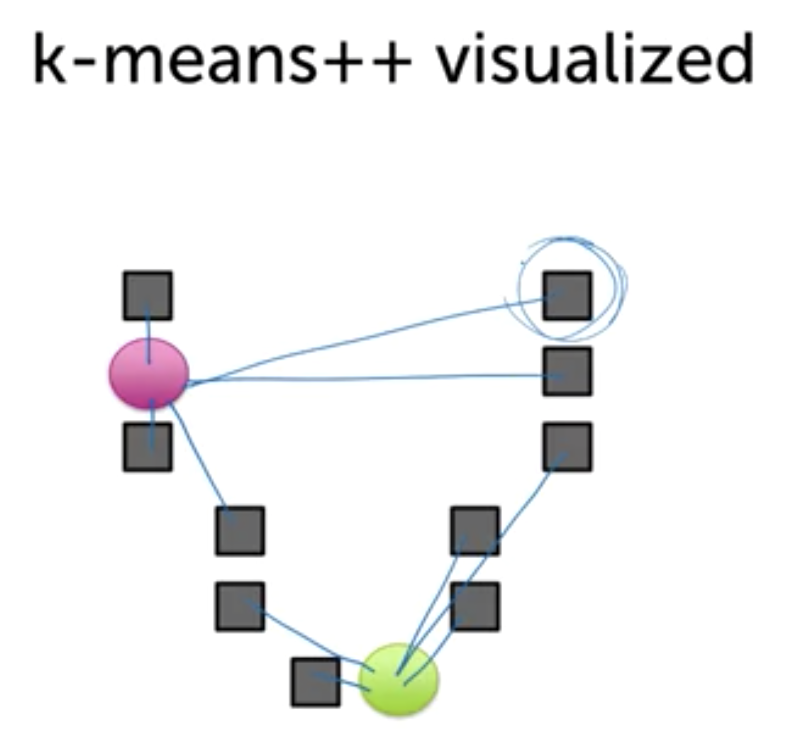
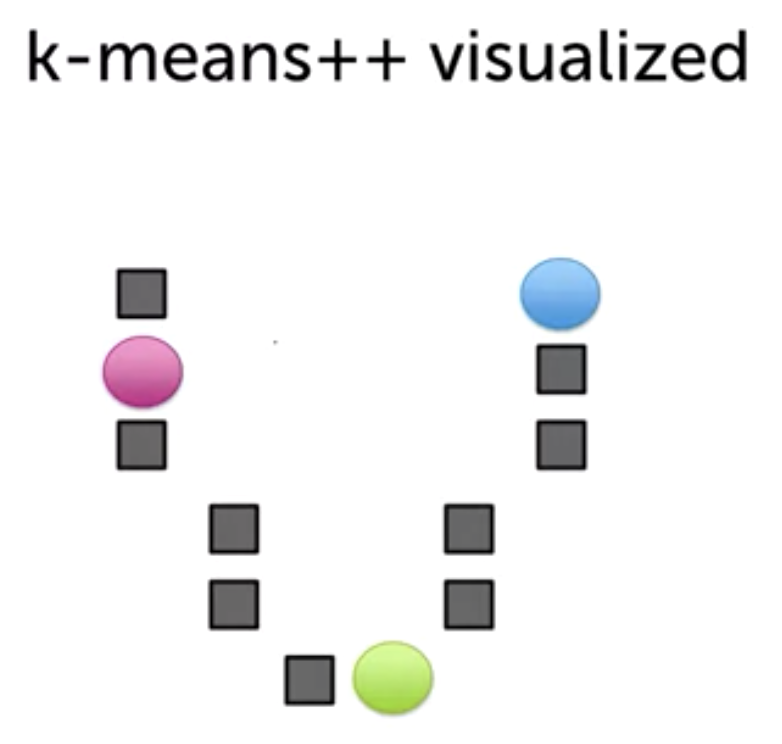

## Байесовский классификатор

In [1024]:
dff = pd.DataFrame(X_train, columns = ['Column_A','Column_B'])
dff['Y'] = Y_train

In [1025]:
class NaiveBayesClassifier():
    '''
    Bayes Theorem form
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        calculate prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed 
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
#         numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        

        fig.suptitle('True vs Predicted Comparison', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()

In [1026]:
df = dff
# shuffle dataset with sample
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
# df shape
print(df.shape)
# set features and target
X, y = df.iloc[:, :-1], df.iloc[:, -1]


# # split on train and test 0.7/0.3
X_train, X_test, y_train, y_test = X[:100], X[100:], y[:100], y[100:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(252, 3)
(100, 2) (100,)
(152, 2) (152,)


In [1027]:
X_train

,Column_A,Column_B
0,700.913598,407.532966
1,-75.508566,-40.377077
2,-65.027184,-42.125192
3,311.733486,224.478446
4,215.316346,314.312333
...,...,...
95,465.067463,594.165038
96,439.996617,517.255642
97,16.141040,-32.454133
98,238.956013,391.293976


In [1028]:
y_train

0     0.0
1     2.0
2     2.0
3     1.0
4     1.0
     ... 
95    0.0
96    0.0
97    2.0
98    1.0
99    0.0
Name: Y, Length: 100, dtype: float64

## Тестируем на тех же данных

In [1029]:
# train the model
x = NaiveBayesClassifier()
x.fit(X_train, y_train)

In [1030]:
predictions = x.predict(X_test)

In [1031]:
x.accuracy(y_test, predictions)

0.9736842105263158

In [1032]:
y_test.value_counts(normalize=True)

1.0    0.361842
0.0    0.322368
2.0    0.315789
Name: Y, dtype: float64

## Тестируем на новых данных

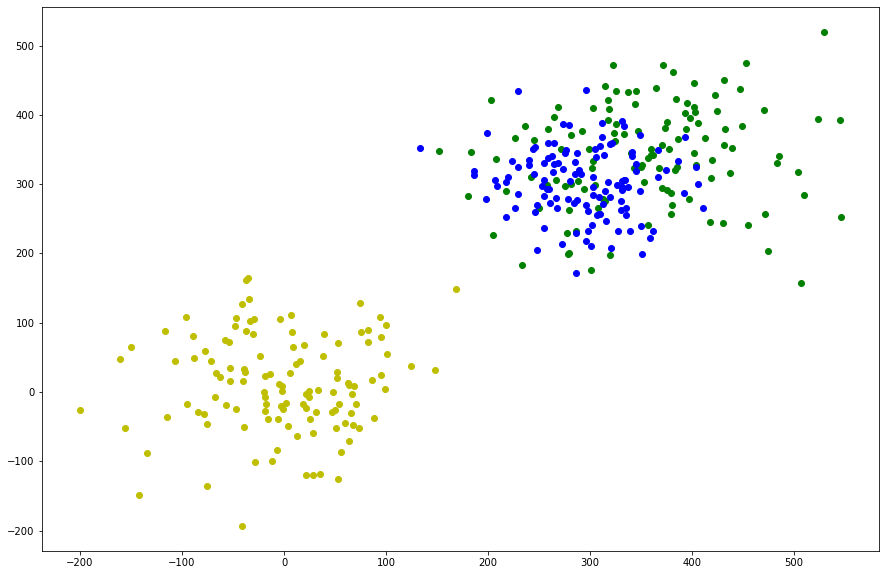

In [886]:
g = GenerateGauss(2, 120)
gaus_distr1 = g.generator(350, 9)
gaus_distr2 = g.generator(300, 7)
gaus_distr3 = g.generator(0, 8)
plt.figure(figsize=(15, 10))  
for x,y in gaus_distr1:
    plt.scatter(x,y, color='g')
for x,y in gaus_distr2:
    plt.scatter(x,y, color='b')
for x,y in gaus_distr3:
    plt.scatter(x,y, color='y')
plt.show()

In [887]:
Y1 = g.make_markers(gaus_distr1, 1)
Y2 = g.make_markers(gaus_distr2, -1)
Y3 = g.make_markers(gaus_distr3, 0)
X_train, Y_train, X_test, Y_test = prepare_data3(gaus_distr1, gaus_distr2, gaus_distr3, Y1, Y2, Y3)

In [888]:
dff = pd.DataFrame(X_train, columns = ['Column_A','Column_B'])
dff['Y'] = Y_train

In [889]:
df = dff
# shuffle dataset with sample
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
# df shape
print(df.shape)
# set features and target
X, y = df.iloc[:, :-1], df.iloc[:, -1]
# split on train and test 0.7/0.3
X_train, X_test, y_train, y_test = X[:100], X[100:], y[:100], y[100:]


(252, 3)


In [890]:
# train the model
x = NaiveBayesClassifier()
x.fit(X_train, y_train)
predictions = x.predict(X_test)
x.accuracy(y_test, predictions)

0.8552631578947368

## Реализация PCA

In [894]:
g = GenerateGauss(4, 120)
gaus_distr1 = g.generator(350, 9)
gaus_distr2 = g.generator(300, 7)
gaus_distr3 = g.generator(0, 8)
Y1 = g.make_markers(gaus_distr1, 1)
Y2 = g.make_markers(gaus_distr2, -1)
Y3 = g.make_markers(gaus_distr3, 0)
X_train, Y_train, X_test, Y_test = prepare_data3(gaus_distr1, gaus_distr2, gaus_distr3, Y1, Y2, Y3)

In [896]:
dff = pd.DataFrame(X_train, columns = ['Column_A','Column_B', 'Column_C', 'Column_D'])
dff['Y'] = Y_train

In [899]:
data = dff

## Шаг 1. Стандартизируем данные


In [927]:
X = dff.iloc[:, :4]
n_samples, n_features = X.shape

In [914]:
y = dff.iloc[:,4]

In [915]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
247    0.0
248    0.0
249    0.0
250    0.0
251    0.0
Name: Y, Length: 252, dtype: float64

In [917]:
def Standardize_data(X):
    return (X - np.mean(X, axis = 0))/np.std(X)

X_std = Standardize_data(X)

In [918]:
X_std

,Column_A,Column_B,Column_C,Column_D
0,1.395514,1.722693,0.043999,0.668304
1,0.520121,1.347909,1.451938,1.975034
2,0.176809,0.826119,0.705141,0.708209
3,0.860949,0.951899,0.079123,0.504484
4,0.476969,1.167213,0.296256,1.330648
...,...,...,...,...
247,-1.119066,-1.134404,-1.146169,-0.753571
248,-1.199274,-1.187597,-0.522410,-1.518053
249,-1.367208,-1.557868,-0.537181,-1.158680
250,-1.057034,-1.906650,-1.239225,-0.699171


## Шаг 2: Ищем ковариационную матрицу


In [919]:
def covariance(x): 
    return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std) # np.cov(X_std.T)

## Шаг 3: Ищем собственные векторы и собственные значения ковариационной матрицы

In [921]:
from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat) 

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [3.53692284 0.18681841 0.14184594 0.15034906]
Eigenvectors 
 [[ 0.50305287  0.50103928  0.50190852  0.49394866]
 [-0.25541069 -0.35360169 -0.24354545  0.86626603]
 [ 0.82288866 -0.35829879 -0.44014399 -0.02737677]
 [-0.06750877  0.70395132 -0.70359556  0.06963037]]


## Шаг 4. Переставляем собственные векторы и собственные значения.
#### Сортируем собственные значения по убыванию.

In [923]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(3.5369228407785567, array([0.50305287, 0.50103928, 0.50190852, 0.49394866])), (0.1868184109783978, array([-0.25541069, -0.35360169, -0.24354545,  0.86626603])), (0.15034906481415106, array([-0.06750877,  0.70395132, -0.70359556,  0.06963037])), (0.14184593840897475, array([ 0.82288866, -0.35829879, -0.44014399, -0.02737677]))]


## Шаг 5. Выберираем основные компоненты
#### Теперь мы выбираем первые k собственных векторов, где k - количество измерений нового подпространства признаков ( k≤nfeatures ).

In [925]:
# Select top k eigenvectors
k = 2
W = eig_vecs_sorted[:k, :] # Projection matrix

print(W.shape)

(2, 4)


Значение k может быть установлено более правильным способом с помощью объясненной дисперсии. Объясненная дисперсия говорит нам, сколько информации (дисперсии) можно отнести к каждому из основных компонентов.

Explained variance: [88.07  4.65  3.74  3.53]
Cumulative explained variance: [88.07 92.72 96.46 99.99]


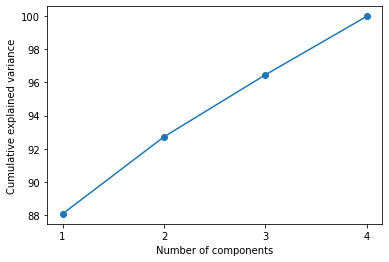

In [928]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

## Шаг 6. Спроецируем данные

#### Наконец, мы можем преобразовать данные X через матрицу проекций W, чтобы получить k-мерное подпространство признаков.

In [933]:
X_proj = X_std.dot(W.T)

print(X_proj.shape)

(252, 2)


In [935]:
X_proj

,0,1
0,1.917345,-0.397363
1,2.641309,0.747825
2,1.206597,0.104488
3,1.198943,-0.138741
4,1.630726,0.545992
...,...,...
247,-2.078827,0.313300
248,-2.210373,-0.461564
249,-2.310276,0.027167
250,-2.454383,0.640312


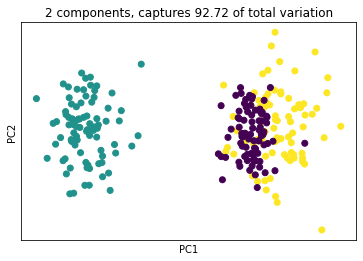

In [942]:
plt.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(cum_explained_variance[1]))
plt.show()

In [1043]:
X_train = X_train.to_numpy()

In [1047]:
X_test = X_test.to_numpy()

In [1049]:
Y_train = y_train.to_numpy()

In [1050]:
Y_train

array([0., 2., 2., 1., 1., 2., 0., 2., 2., 0., 2., 2., 1., 2., 1., 0., 2.,
       0., 0., 0., 2., 0., 1., 2., 1., 1., 2., 2., 0., 2., 2., 0., 0., 2.,
       1., 2., 0., 0., 0., 2., 2., 0., 1., 1., 0., 1., 0., 0., 0., 0., 2.,
       1., 1., 1., 2., 1., 1., 0., 0., 1., 2., 1., 2., 2., 0., 2., 0., 2.,
       1., 0., 1., 2., 2., 2., 2., 0., 1., 2., 2., 2., 1., 0., 1., 0., 0.,
       2., 0., 1., 1., 0., 1., 2., 1., 1., 0., 0., 0., 2., 1., 0.])

In [1064]:
import operator 
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNearestNeighbors():
    
    def __init__(self, K=3):
        self.K = K
 
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
    
    def predict(self, X_test):
        
        # list to store all our predictions
        predictions = []
        
        # loop over all observations in the test set
        for i in range(len(X_test)):            
            
            # calculate the distance between the test point and all other points in the training set
            dist = np.array([euc_dist(X_test[i], x_t) for x_t in self.X_train])
            
            # sort the distances and return the indices of K neighbors
            dist_sorted = dist.argsort()[:self.K]
            
            # get the neighbors
            neigh_count = {}

            # for each neighbor find the class
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
            
            # append the class label to the list
            predictions.append(sorted_neigh_count[0][0])
        return predictions


In [1065]:
clf = KNearestNeighbors(K=5)
clf.fit(X_train, y_train)
 
predictions = clf.predict(X_test)
 
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.9802631578947368


In [1066]:
type(accuracy_score)

function

TypeError: 'str' object is not callable